# Исследование надёжности заёмщиков

**Заказчик исследования** — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов, а именно таблица с данными, на основе которых необходимо выявить зависимости.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Обзор данных

In [90]:
# импорт библиотек и методов
import pandas as pd
from IPython.display import display

In [91]:
# чтение файла
df = pd.read_csv('/datasets/data.csv')

In [92]:
# вывод первых десяти строк таблицы
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [93]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [94]:
# получение сводки числовых значений данных в таблице df
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Из полученной информации следует, что таблица содержит 12 столбцов с типами данных:

- `float64`
- `int64`
- `object`

**Исходные данные:**

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита


В названиях колонок отсутствуют нарушения стиля.
Количество значений в столбцах различается. Следовательно, в данных есть пропущенные значения. В столбцах `children` и `days_employed` присутствуют отрицательные значения, чего быть не должно.

**Выводы**

Каждая строка таблицы  —  данные о потенциальном клиенте кредитного отдела банка. Колонки входной таблицы предоставляют информацию о поле и возрасте клиента, его семейной жизни *(количество детей в семье, семейное положение, идентификатор семейного положения)*, карьерно-образовательном статусе *(уровень образования клиента, идентификатор уровня образования, тип занятости, ежемесячный доход)*, а такаже о цели получения кредита и имеющейся задолженности по возврату кредитов в срок.

Предварительно можно утверждать, что данных достаточно для исследования надёжности заёмщиков. Однако в данных встречаются пропуски, дубликаты, некорректно введенные значения. 

Чтобы проводить исследование, необходимо прежде всего устранить проблемы в данных.

## Шаг 2. Предобработка данных

### Обработка пропусков

In [95]:
# подсчёт доли пропусков
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

В таблице обнаружены пропуски количественных переменных в `days_employed` и `total_income`. Возможные причины пропусков — отсутствие рабочего стажа у потенциальных клиентов, нежелание отражать свой заработок, подсчитывать общий трудовой стаж в днях. Пропуски составляют 10% от общего количества информации - доля значительная, поэтому необходимо заполнить их адекватными значениями. 

Для начала заполним пропуски в столбцах `days_employed` и `total_income` переменными типа *unknown*, чтобы впоследствии можно было совершать операции с этими ячейками:

In [96]:
# заполнение пропусков столбцов "days_employed" и "total_income"
df['days_employed'] = df['days_employed'].fillna('unknown')
df['total_income'] = df['total_income'].fillna('unknown')

In [97]:
# проверка наличия пропусков
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Чтобы заполнить пропуски в столбце `total_income` адекватными значениями, необходимо определить: данные из каких колонок могут влиять на значения в указанном столбце. В нашем случае на ежемесячный доход могут влиять образование `education`, общий трудовой стаж в днях `days_employed`, тип занятости `income_type`.

Будем заполнять пропуски в столбце `total_income` зависимости от типа занятости `income_type`.

Отфильтруем таблицу данных таким образом, чтобы в ней осталась информация только о тех данных, которые нужно заменить адекватными значениями. Запишем отфильтрованную таблицу в новую переменную. 

In [98]:
# создание таблицы данных, подлежащих обработке
df_filtered = df[df['total_income'] == 'unknown']
df_filtered = df_filtered[df_filtered['days_employed'] == 'unknown']
display(df_filtered)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,unknown,65,среднее,1,гражданский брак,1,M,пенсионер,0,unknown,сыграть свадьбу
26,0,unknown,41,среднее,1,женат / замужем,0,M,госслужащий,0,unknown,образование
29,0,unknown,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,unknown,строительство жилой недвижимости
41,0,unknown,50,среднее,1,женат / замужем,0,F,госслужащий,0,unknown,сделка с подержанным автомобилем
55,0,unknown,54,среднее,1,гражданский брак,1,F,пенсионер,1,unknown,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,unknown,47,Среднее,1,женат / замужем,0,M,компаньон,0,unknown,сделка с автомобилем
21495,1,unknown,50,среднее,1,гражданский брак,1,F,сотрудник,0,unknown,свадьба
21497,0,unknown,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,unknown,строительство недвижимости
21502,1,unknown,42,среднее,1,женат / замужем,0,F,сотрудник,0,unknown,строительство жилой недвижимости


Посмотрим, какие типы занятости представлены в отфильтрованной таблице:

In [99]:
# вывод уникальных значений столбца "income_type"
df_filtered['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Значения типа *unknown* в столбце `total_income` таблицы *df* заполним медианными значениями в зависимости от типа занятости. Для каждого типа занятости найдём медианное значение ежемесячного дохода.

In [100]:
# цикл для нахождения медианных значений
income_types = ['сотрудник', 'компаньон', 'пенсионер', 'госслужащий', 'предприниматель']
median_values_income_type = []

for income_type in income_types:
    df_filtered = df[df['income_type'] == income_type]
    df_filtered = df_filtered[df_filtered['total_income'] != 'unknown']
    median_values_income_type.append(df_filtered['total_income'].median().astype('int'))
    
print(median_values_income_type)

[142594, 172357, 118514, 150447, 499163]


Создадим функцию, которая будет присваивать медианное значение ежемесячного дохода в зависимости от типа занятости:

In [101]:
# функция медианных значений ежемесячного дохода
def median_income_type(income_type):
    """
    Присваивает медианное значение ежемесячного дохода по значению типа занятости, используя правила:
    - '142594', если 'income_type' = 'сотрудник',
    - '172357', если 'income_type' = 'компаньон',
    - '118514', если 'income_type' = 'пенсионер',
    - '150447', если 'income_type' = 'госслужащий',
    - '499163', если 'income_type' = 'предприниматель',
    """
    if income_type == 'сотрудник':
        return 142594
    if income_type == 'компаньон':
        return 172357
    if income_type == 'пенсионер':
        return 118514
    if income_type == 'госслужащий':
        return 150447
    if income_type == 'предприниматель':
        return 499163

Проверка работы функции:

In [102]:
print(median_income_type('сотрудник'))
print(median_income_type('компаньон'))
print(median_income_type('пенсионер'))
print(median_income_type('госслужащий'))
print(median_income_type('предприниматель'))

142594
172357
118514
150447
499163


Функция работает корректно.

Применяем функцию `median_income_type` к столбцу `income_type`. Результаты записываем в новый столбец.

In [103]:
# применение функции
df['total_income_median'] = df['income_type'].apply(median_income_type)  
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_median
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,142594.0
1,1,-4024.8,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,142594.0
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,142594.0
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование,142594.0
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,118514.0
5,0,-926.186,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья,172357.0
6,0,-2879.2,43,высшее,0,женат / замужем,0,F,компаньон,0,240526,операции с жильем,172357.0
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135824,образование,142594.0
8,2,-6929.87,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.8,на проведение свадьбы,142594.0
9,0,-2188.76,41,среднее,1,женат / замужем,0,M,сотрудник,0,144426,покупка жилья для семьи,142594.0


Заменяем значения типа *unknown* значениями из нового столбца:

In [104]:
# замена пропусков адекватными значениями
df.loc[df['total_income'] == 'unknown', 'total_income'] = df['total_income_median']
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_median
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,142594.0
1,1,-4024.8,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,142594.0
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,142594.0
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование,142594.0
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,118514.0
5,0,-926.186,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья,172357.0
6,0,-2879.2,43,высшее,0,женат / замужем,0,F,компаньон,0,240526,операции с жильем,172357.0
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135824,образование,142594.0
8,2,-6929.87,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.8,на проведение свадьбы,142594.0
9,0,-2188.76,41,среднее,1,женат / замужем,0,M,сотрудник,0,144426,покупка жилья для семьи,142594.0


Проверяем столбец `total_income` на наличие переменных типа *unknown*:

In [105]:
# проверка
print(df[df['total_income'] == 'unknown'])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, total_income_median]
Index: []


Удаляем столбец `total_income_median`, т.к. он больше не нужен.

In [106]:
# удаление ненужного столбца
df = df.drop('total_income_median', axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья
1,1,-4024.8,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Приступаем к обработке значений типа *unknown* в столбце `days_employed`. Чтобы получить адекватные значения в колонке `days_employed`, необходимо определить: данные из каких колонок могут влиять на значения в указанном столбце. На общий трудовой стаж в днях могут влиять возраст клиента в годах `dob_years`, уровень образования `education`, тип занятости `income_type`.

Будем заполнять столбец `days_employed` в зависимости от возраста клиента в годах `dob_years`.

Однако сначала нужно привести данные в столбце `days_employed` к абсолютным значениям, т.к. отрицательного трудового стажа быть не может. Вероятно возникла ошибка при вводе данных, т.к. процент отрицательных перменных значительный, что видно из процентилей сводки числовых значений данных таблицы *df* (25%, 50%, 75%).

In [24]:
# замена переменных типа "unknown" для последующей обработки методом "abs()"
df.loc[df['days_employed'] == 'unknown', 'days_employed'] = 0

Используем метод *astype()* для приведения данных к типу `int` и метод *abs()* для получения модулей переменных:

In [25]:
# замена переменных абсолютными значения
df['days_employed'] = df['days_employed'].astype('int').abs()

Проверяем наличие отрицательных значений:

In [26]:
# проверка
print(df[df['days_employed'] < 0])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


In [27]:
# вывод части таблицы
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240526,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135824,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.8,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144426,покупка жилья для семьи


Формируем три возрастные группы, относительно которых будут подсчитаны медианные значения в столбце `days_employed`:

In [28]:
# формирование первой возрастной группы и подсчёт медианного значения
df_filtered_0_25 = df[df['dob_years'] <= 25]
median_days_employed_0_25 = df_filtered_0_25['days_employed'].median().astype('int')
print(median_days_employed_0_25)

744


In [29]:
# формирование второй возрастной группы и подсчёт медианного значения
df_filtered_25_50 = df[(df['dob_years'] > 25)&(df['dob_years'] <= 50)]
median_days_employed_25_50 = df_filtered_25_50['days_employed'].median().astype('int')
print(median_days_employed_25_50)

1466


In [30]:
# формирование третьей возрастной группы и подсчёт медианного значения
df_filtered_50_75 = df[df['dob_years'] > 50]
median_days_employed_50_75 = df_filtered_50_75['days_employed'].median().astype('int')
print(median_days_employed_50_75)

10950


Напишем функцию, которая будет присваивать значение общего трудового стажа в днях в зависимости от возраста клиента в годах:

In [31]:
# функция присваивания значения трудового стажа в годах
def median_days_employed(dob_years):
    """
    Присваивает медианное значение общего трудового стажа в днях по значению возраста клиента в годах, используя правила:
    - '744', если 'dob_years' <= 25,
    - '1466', если 'dob_years' > 25 и <= 50,
    - '10950', если 'dob_years' > 75

    """
    if dob_years <= 25:
        return 744
    if (dob_years > 25) and (dob_years <= 50):
        return 1466
    if dob_years > 50:
        return 10950

Проверяем работу функции:

In [32]:
# проверка работы функции
print(median_days_employed(15))
print(median_days_employed(30))
print(median_days_employed(70))

744
1466
10950


Функция работает корректно.

Применяем функцию `median_days_employed` к столбцу `dob_years`. Результаты записываем в новый столбец.

In [33]:
# применение функции
df['days_employed_median'] = df['dob_years'].apply(median_days_employed)    
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_median
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,1466
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,1466
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,1466
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование,1466
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,10950
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья,1466
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240526,операции с жильем,1466
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135824,образование,1466
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.8,на проведение свадьбы,1466
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144426,покупка жилья для семьи,1466


Заменяем значения типа *unknown* значениями из нового столбца:

In [34]:
# замена пропусков адекватными значениями
df.loc[df['days_employed'] == 0, 'days_employed'] = df['days_employed_median']
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_median
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,1466
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,1466
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,1466
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование,1466
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,10950
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья,1466
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240526,операции с жильем,1466
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135824,образование,1466
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.8,на проведение свадьбы,1466
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144426,покупка жилья для семьи,1466


Проверяем столбец `days_employed` на наличие нулевых значений, присвоенных ранее:

In [35]:
# проверка
print(df[df['days_employed'] == 0])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, days_employed_median]
Index: []


Удаляем столбец `days_employed_median`, т.к. он больше не нужен.

In [36]:
df = df.drop('days_employed_median', axis=1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267629,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Убедимся, что в таблице не осталось пропусков. Для этого ещё раз считаем пропущенные значения.

In [37]:
# подсчёт пропусков
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Пропуски значений заполнены. Продолжаем предобработку данных.

### Замена типа данных

Для более удобной работы с данными необходимо, чтобы все числовые значения являлись целочисленными. Проверим типы данных атрибутом датафрейма `.info()`.

In [38]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null object
purpose             21525 non-null object
dtypes: int64(6), object(6)
memory usage: 2.0+ MB


Данные в столбце `total_income` представлены типом `object`. Приведём их к типу `int`.

In [39]:
# приведение данных к типу "int" 
df['total_income'] = df['total_income'].astype('int')

Снова проверяем типы данных:

In [40]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Из сводки числовых значений данных *df* видим, что в столбце `children` присутствуют отрицательные значени, т.е. аномальные величины. Оценим количество аномальных величин, используя метод *value_counts()*.

In [41]:
# вывод уникальных значений
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Оценим процентное соотношение аномальных величин и общего количества значений:

In [42]:
# оценка доли отрицательных значений в столбце "children"
children_amount = df['children'].sum()
children_less_than_0_amount = 47
children_percent_less_than_0 = children_less_than_0_amount / children_amount
print(children_percent_less_than_0)

0.004051724137931034


Доля аномальных величин составляет меньше 1%, следовательно эти данные не имеют значительного влияния на результат. Поэтому предположим, что при заполнение данных возникла ошибка. Вместо положительного значения ввели отрицательное.

Заменим отрицательные значения столбца `children` абсолютными величинами:

In [43]:
# приведение целочисленных значений к абсолютным величинам
df['children'] = df['children'].abs()

Проверим наличие отрицательных значений:

In [44]:
# проверка на наличие отрицательных значений
print(df[df['children'] < 0])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


Остальные колонки обработаны в предыдущем подразделе.

**Вывод**

Типы данных в количественных переменных приведены к единому формату. Приступаем к обработке дубликатов.

### Обработка дубликатов

Явные дубликаты в таблице, вероятно, появились из-за ошибки программы при сборе данных. На наличие неявных дубликатов мог повлиять свободный формат ввода данных в ячейку, при котором невозможно выбрать один из указанных вариантов ответа.

Перед тем как приступать к подсчёту дубликатов, приведем все данные в таблице к *нижнему регистру*, чтобы не упускать дубликаты:

In [45]:
# приведение данных к нижнему регистру
columns_to_change = ['education', 'family_status', 'gender', 'income_type', 'purpose']
for column in columns_to_change:
    df[column] = df[column].str.lower()

Теперь можно вести подсчёт дубликатов:

In [46]:
# подсчёт дуликатов
print('Количество явных дубликатов: {}'.format(df.duplicated().sum()))

Количество явных дубликатов: 71


Вызываем специальный метод `pandas`, чтобы удалить дубликаты:

In [47]:
# удаление дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop = True)

Ещё раз подсчитываем количество дубликатов, чтобы убедиться, что мы полностью от них избавились:

In [48]:
# подсчёт дубликатов
print('Количество явных дубликатов: {}'.format(df.duplicated().sum()))

Количество явных дубликатов: 0


**Вывод**

Обработка данных на наличие дубликатов завершена. Явные и неявные дубликаты удалены.

### Лемматизация

Выделим леммы в значениях столбца `purpose`.

Для этого сначала импортируем библиотеку с функцией лемматизации на русском языке `pymystem3` и специальный контейнер `Counter` для подсчёта упоминаний лемматизированных слов:

In [49]:
# импорт библиотеки и специального контейнера
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

Проводим лемматизацию в столбце `purpose`:

In [ ]:
# создание пустого списка для хранения лемм
lemmas_purpose = []
# цикл для нахождения лемм в столбцe 'purpose'
for index in range(len(df)):
    lemmas = m.lemmatize(df.loc[index,'purpose'])
    lemmas_purpose += lemmas

Выводим число упоминаний лемматизированных слов:

In [51]:
print(Counter(lemmas_purpose))

Counter({' ': 33570, '\n': 21454, 'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'подержанный': 486, 'подержать': 478, 'приобретение': 461, 'профильный': 436})


**Вывод**

Проведена лемматизация столбца `purpose`. Подсчитано количество упоминаний лемм. 

### Категоризация данных

Проанализировав столбцы таблицы, можно сразу отметить колонки `education`, `education_id` и `family_status`, `family_status_id`.
Эти колонки содержат одну и ту же информацию, но представленную в разных форматах.

Поделим таблицу на 3 части: 
- в первой оставим все столбцы, кроме *education* и *family_status*
- вторая станет "словарём" к столбцу *education_id*: будет содержать уровень образования клиента
- третья станет "словарём" к столбцу *family_status_id*: будет содержать семейное положение


In [52]:
# формирование первой части таблицы
df_log = df[['children',
             'days_employed',
             'dob_years',
             'education_id',
             'family_status_id',
             'gender',
             'income_type',
             'debt',
             'total_income',
             'purpose']]

# вывод первых 10 строк полученной части таблицы
df_log.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,f,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,m,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,m,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,f,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,0,1,m,компаньон,0,255763,покупка жилья
6,0,2879,43,0,0,f,компаньон,0,240525,операции с жильем
7,0,152,50,1,0,m,сотрудник,0,135823,образование
8,2,6929,35,0,1,f,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,1,0,m,сотрудник,0,144425,покупка жилья для семьи


In [53]:
# формирование второй части таблицы/"словаря"
df_dict_education = df[['education_id', 'education']]
# вывод первых 10 строк таблицы
display(df_dict_education.head(10))

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
5,0,высшее
6,0,высшее
7,1,среднее
8,0,высшее
9,1,среднее


In [54]:
# удаление дубликатов и вывод таблицы
df_dict_education = df_dict_education.drop_duplicates().reset_index(drop = True)
display(df_dict_education)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [55]:
# формирование третьей части таблицы/"словаря"
df_dict_family_status = df[['family_status_id', 'family_status']]
# вывод первых 10 строк таблицы
display(df_dict_family_status.head(10))

,family_status_id,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,1,гражданский брак
5,1,гражданский брак
6,0,женат / замужем
7,0,женат / замужем
8,1,гражданский брак
9,0,женат / замужем


In [56]:
# удаление дубликатов и вывод таблицы
df_dict_family_status = df_dict_family_status.drop_duplicates().reset_index(drop = True)
display(df_dict_family_status)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Текстовая информация, которая занимает много места, осталась в столбцах `income_type` и `purpose`. Начнем с категоризации в столбце `income_type`.

Чтобы представить информацию более компактно, необходимо каждому типу занятости в `income_type` присвоить свой id. Для этого сначала посмотрим: какие типы занятости задействованы в таблице. Воспользуемся методом *unique()*.

In [57]:
# вывод уникальных значений типа занятости
print(df['income_type'].unique())

['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


Теперь напишем функцию, которая приваивает id каждому типу занятости:

In [58]:
# функция присваивания id типам занятости
def income_type_id(income_type):
    """
    Присваивает номер группы по значению типа занятости, используя правила:
    - '0', если 'income_type' = 'сотрудник',
    - '1', если 'income_type' = 'пенсионер',
    - '2', если 'income_type' = 'компаньон',
    - '3', если 'income_type' = 'госслужащий',
    - '4', если 'income_type' = 'безработный',
    - '5', если 'income_type' = 'предприниматель',
    - '6', если 'income_type' = 'студент',
    - '7', если 'income_type' = 'в декрете',
    """
    if income_type == 'сотрудник':
        return 0
    if income_type == 'пенсионер':
        return 1
    if income_type == 'компаньон':
        return 2
    if income_type == 'госслужащий':
        return 3
    if income_type == 'безработный':
        return 4
    if income_type == 'предприниматель':
        return 5
    if income_type == 'студент':
        return 6
    if income_type == 'в декрете':
        return 7

Проверка работоспособности функции:

In [59]:
# вывод значений 
print(income_type_id('сотрудник'))
print(income_type_id('пенсионер'))
print(income_type_id('компаньон'))
print(income_type_id('госслужащий'))
print(income_type_id('безработный'))
print(income_type_id('предприниматель'))
print(income_type_id('студент'))
print(income_type_id('в декрете'))

0
1
2
3
4
5
6
7


Функция работает корректно.

Создаём столбец `income_type_id` c присвоенными id, используя метод *apply()* и функцию *income_type_id*. Столбец добавляем не в конец таблицы, а следующим за столбцом `income_type` для большей наглядности. Применяем метод *insert()*.

In [60]:
# добавление колонки "income_type_id" в таблицу
df.insert(9,'income_type_id',df['income_type'].apply(income_type_id))
# вывод первых 10 строк таблицы
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,income_type_id,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,1,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,2,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,2,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,0,144425,покупка жилья для семьи


Создаём третий словарь-таблицу, который содержит информацию о типе занятости:

In [61]:
# формирование словаря-таблицы типов занятости
df_dict_income_type = df[['income_type_id', 'income_type']]
# вывод первых 10 строк таблицы
df_dict_income_type.head(10)

,income_type_id,income_type
0,0,сотрудник
1,0,сотрудник
2,0,сотрудник
3,0,сотрудник
4,1,пенсионер
5,2,компаньон
6,2,компаньон
7,0,сотрудник
8,0,сотрудник
9,0,сотрудник


In [62]:
# удаление дубликтов и вывод таблицы
df_dict_income_type = df_dict_income_type.drop_duplicates().reset_index(drop = True)
display(df_dict_income_type)

,income_type_id,income_type
0,0,сотрудник
1,1,пенсионер
2,2,компаньон
3,3,госслужащий
4,4,безработный
5,5,предприниматель
6,6,студент
7,7,в декрете


Обновим первую часть таблицы df_log. Удалим столбец `income_type` и добавим столбец `income_type_id`.

In [63]:
# обновление первой части таблицы и вывод первых 10 значений
df_log = df[['children',
             'days_employed',
             'dob_years',
             'education_id',
             'family_status_id',
             'gender',
             'income_type_id',
             'debt',
             'total_income',
             'purpose']]

df_log.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type_id,debt,total_income,purpose
0,1,8437,42,0,0,f,0,0,253875,покупка жилья
1,1,4024,36,1,0,f,0,0,112080,приобретение автомобиля
2,0,5623,33,1,0,m,0,0,145885,покупка жилья
3,3,4124,32,1,0,m,0,0,267628,дополнительное образование
4,0,340266,53,1,1,f,1,0,158616,сыграть свадьбу
5,0,926,27,0,1,m,2,0,255763,покупка жилья
6,0,2879,43,0,0,f,2,0,240525,операции с жильем
7,0,152,50,1,0,m,0,0,135823,образование
8,2,6929,35,0,1,f,0,0,95856,на проведение свадьбы
9,0,2188,41,1,0,m,0,0,144425,покупка жилья для семьи


Приступаем к столбцу `purpose`. 

В разделе *лемматизации* мы находили леммы слов. Выведем уникальные значения столбца `purpose`, чтобы подобрать леммы, которые помогут категоризировать данные:

In [64]:
# вывод уникальных значений столбца "purpose"
print(df['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Напишем функцию, которая категоризирует данные столбца `purpose` c использованием лемм:

In [65]:
# функция присваивания категории значениям в столбце "purpose"
def purpose_group(purpose):
    """
    Возвращает категорию цели по значению цели purpose, используя правила:
    - 'операции с недвижимостью' при значении лемм 'жилье' или 'недвижимость' в purpose,
    - 'образовательные услуги' при значении леммы 'образование' в purpose,
    - 'сделки с автомобилем' при значении леммы 'автомобиль' в purpose,
    - 'свадебные расходы' при остальных значениях леммы в purpose
    """
    lemmas = m.lemmatize(purpose)
    if ('жилье' or 'недвижимость') in lemmas:
        return 'операции с недвижимостью'
    elif 'образование' in lemmas:
        return 'образовательные услуги'
    elif 'автомобиль' in lemmas:
        return 'сделки с автомобилем'
    else:
        return 'свадебные расходы'
    

Проверим работу функции:

In [66]:
# вывод значений
print(purpose_group('хочу свадьбу'))
print(purpose_group('ремонт автомобиля'))
print(purpose_group('получить высшее образование'))
print(purpose_group('сниму жилье'))

свадебные расходы
сделки с автомобилем
образовательные услуги
операции с недвижимостью


Функция работает корректно.

Создаём столбец `purpose_group`, используя метод *apply()* и функцию *purpose_group*. Столбец добавляем в конец таблицы.

In [67]:
# добавление колонки "purpose_group" в таблицу
df['purpose_group'] = df['purpose'].apply(purpose_group)
# вывод первых 10 строк таблицы
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,income_type_id,debt,total_income,purpose,purpose_group
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,0,112080,приобретение автомобиля,сделки с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,0,267628,дополнительное образование,образовательные услуги
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,1,0,158616,сыграть свадьбу,свадебные расходы
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,2,0,255763,покупка жилья,операции с недвижимостью
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,2,0,240525,операции с жильем,операции с недвижимостью
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,0,135823,образование,образовательные услуги
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,0,95856,на проведение свадьбы,свадебные расходы
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,0,144425,покупка жилья для семьи,операции с недвижимостью


Каждой категории в `purpose_group` присвоим id с помощью функции *purpose_group_id*:

In [68]:
# функция присваивания id целевым группам в "purpose_group"
def purpose_group_id(purpose_group):
    """
    Присваивает номер целевой группы по значению целевой группы purpose_group, используя правила:
    - '0', если 'purpose_group' = 'операции с недвижимостью',
    - '1', если 'purpose_group' = 'образовательные услуги',
    - '2', если 'purpose_group' = 'сделки с автомобилем',
    - '3', если 'purpose_group' = 'другое'
    """
    if purpose_group == 'операции с недвижимостью':
        return 0
    if purpose_group == 'образовательные услуги':
        return 1
    if purpose_group == 'сделки с автомобилем':
        return 2
    if purpose_group == 'свадебные расходы':
        return 3

Создаём столбец `purpose_group_id`, используя метод *apply()* и функцию *purpose_group_id*. Столбец добавляем в конец таблицы.

In [69]:
# добавление колонки "purpose_group_id" в таблицу
df['purpose_group_id'] = df['purpose_group'].apply(purpose_group_id)
# вывод первых 10 строк таблицы
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,income_type_id,debt,total_income,purpose,purpose_group,purpose_group_id
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,0,253875,покупка жилья,операции с недвижимостью,0
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,0,112080,приобретение автомобиля,сделки с автомобилем,2
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,0,145885,покупка жилья,операции с недвижимостью,0
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,0,267628,дополнительное образование,образовательные услуги,1
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,1,0,158616,сыграть свадьбу,свадебные расходы,3
5,0,926,27,высшее,0,гражданский брак,1,m,компаньон,2,0,255763,покупка жилья,операции с недвижимостью,0
6,0,2879,43,высшее,0,женат / замужем,0,f,компаньон,2,0,240525,операции с жильем,операции с недвижимостью,0
7,0,152,50,среднее,1,женат / замужем,0,m,сотрудник,0,0,135823,образование,образовательные услуги,1
8,2,6929,35,высшее,0,гражданский брак,1,f,сотрудник,0,0,95856,на проведение свадьбы,свадебные расходы,3
9,0,2188,41,среднее,1,женат / замужем,0,m,сотрудник,0,0,144425,покупка жилья для семьи,операции с недвижимостью,0


Создаём четвертый словарь-таблицу, который содержит информацию о цели получения кредита.

In [70]:
# формирование словаря-таблицы целей получения кредита
df_dict_purpose_group = df[['purpose_group_id', 'purpose_group']]
# вывод первых 10 строк таблицы
df_dict_purpose_group.head(10)

,purpose_group_id,purpose_group
0,0,операции с недвижимостью
1,2,сделки с автомобилем
2,0,операции с недвижимостью
3,1,образовательные услуги
4,3,свадебные расходы
5,0,операции с недвижимостью
6,0,операции с недвижимостью
7,1,образовательные услуги
8,3,свадебные расходы
9,0,операции с недвижимостью


In [71]:
# удаление дубликатов и вывод таблицы
df_dict_purpose_group = df_dict_purpose_group.drop_duplicates().reset_index(drop = True)
display(df_dict_purpose_group)

,purpose_group_id,purpose_group
0,0,операции с недвижимостью
1,2,сделки с автомобилем
2,1,образовательные услуги
3,3,свадебные расходы


Обновим первую часть таблицы df_log. Удалим столбец `purpose` и добавим столбец `purpose_group_id`.

In [72]:
# обновление первой части таблицы и вывод первых 10 значений
df_log = df[['children',
             'days_employed',
             'dob_years',
             'education_id',
             'family_status_id',
             'gender',
             'income_type_id',
             'debt',
             'total_income',
             'purpose_group_id']]

df_log.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type_id,debt,total_income,purpose_group_id
0,1,8437,42,0,0,f,0,0,253875,0
1,1,4024,36,1,0,f,0,0,112080,2
2,0,5623,33,1,0,m,0,0,145885,0
3,3,4124,32,1,0,m,0,0,267628,1
4,0,340266,53,1,1,f,1,0,158616,3
5,0,926,27,0,1,m,2,0,255763,0
6,0,2879,43,0,0,f,2,0,240525,0
7,0,152,50,1,0,m,0,0,135823,1
8,2,6929,35,0,1,f,0,0,95856,3
9,0,2188,41,1,0,m,0,0,144425,0


**Вывод**

В процессе категоризация исходная таблица *df* была поделена на части:
- первая часть — *df_log*, из которой исключены столбцы `education`, `family_status`, `income_type`, `purpose` таблицы *df*
- вторая часть — таблицы-словари к *df_log*: `df_dict_education`, `df_dict_family_status`, `df_dict_income_type`, `df_dict_purpose_group`

Столбец `purpose` исключен в процессе категоризации, т.к. для исследования информации столбца `purpose_group` будет достаточно.


## Шаг 3. Ответьте на вопросы

- **Есть ли зависимость между наличием детей и возвратом кредита в срок?**

Для того чтобы оценить влияние наличия детей на возврат кредита в срок, необходимо построить 2 столбчатые диаграммы: для клиентов с детьми и без детей, используя колонки `children` и `debt`.

In [73]:
# импорт библиотеки "seaborn" для построения столбчатых диаграмм
import seaborn as sns

Диаграмма наличия задолженности у клиентов без детей


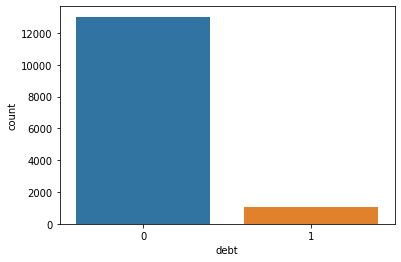

In [74]:
# построение диаграммы для клиентов без детей
children_amount_0 = df_log[df_log['children'] == 0]
sns.countplot(children_amount_0['debt'])
print('Диаграмма наличия задолженности у клиентов без детей')

Диаграмма наличия задолженности у клиентов с детьми


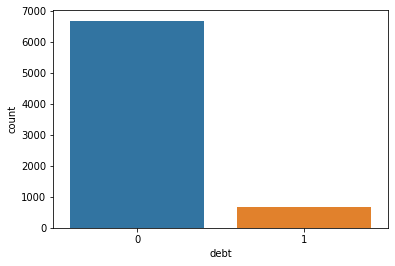

In [75]:
# построение диаграммы для клиентов с детьми
children_amount_not_0 = df_log[df_log['children'] != 0]
sns.countplot(children_amount_not_0['debt'])
print('Диаграмма наличия задолженности у клиентов с детьми')

Напишем функцию, которая в процентах посчитает долю клиентов с задолженностью в зависимости от наличия детей:

In [76]:
# функция для подсчёта клиентов с задолженностью в процентах
def children_debt_percent(data):
    return int(round(data['debt'].mean() * 100))

print('Наличие задолженности у клиентов без детей:', children_debt_percent(children_amount_0), '%')
print('Наличие задолженности у клиентов c детьми:', children_debt_percent(children_amount_not_0), '%')

Наличие задолженности у клиентов без детей: 8 %
Наличие задолженности у клиентов c детьми: 9 %


**Вывод**

Доля клиентов с задолженностью среди клиентов с детьми больше доли клиентов с задолженностью среди клиентов без детей на 1%. Т.е. можно сказать, что при наличии детей у клиента вероятность возврата кредита в срок ниже, чем у клиента без детей. 

- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Для того чтобы оценить влияние семейного положения на возврат кредита в срок, необходимо построить 2 столбчатые диаграммы: для клиентов в браке/гражданском браке и клиентов, не состоящих в браке/гражданском браке. Для построения используем колонки `family_status_id` и `debt`.

Диаграмма наличия задолженности у клиентов, состоящих в браке/гражданском браке


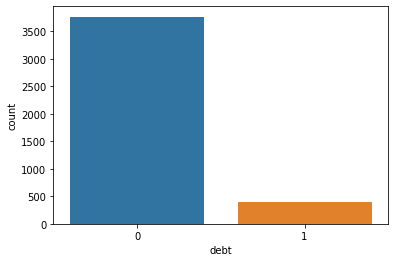

In [77]:
# построение диаграммы для клиентов, состоящих в браке/гражданском браке
clients_in_family = df_log[df_log['family_status_id'] == (0 or 1)]
sns.countplot(clients_in_family['debt'])
print('Диаграмма наличия задолженности у клиентов, состоящих в браке/гражданском браке')

Диаграмма наличия задолженности у клиентов, не состоящих в браке/гражданском браке


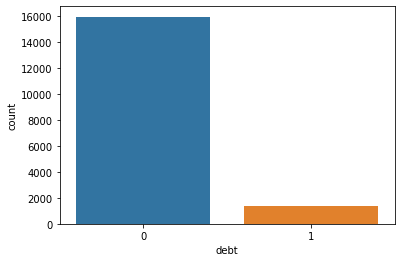

In [78]:
# построение диаграммы для клиентов, не состоящих в браке/гражданском браке
clients_not_in_family = df_log[df_log['family_status_id'] != (0 or 1)]
sns.countplot(clients_not_in_family['debt'])
print('Диаграмма наличия задолженности у клиентов, не состоящих в браке/гражданском браке')

Напишем функцию, которая в процентах посчитает долю клиентов с задолженностью в зависимости от семейного положения:

In [79]:
# функция для подсчёта клиентов с задолженностью в процентах
def family_status_debt_percent(data):
    return int(round(data['debt'].mean() * 100))

print('Наличие задолженности у клиентов в браке:', family_status_debt_percent(clients_in_family), '%')
print('Наличие задолженности у клиентов не в браке:', family_status_debt_percent(clients_not_in_family), '%')

Наличие задолженности у клиентов в браке: 9 %
Наличие задолженности у клиентов не в браке: 8 %


**Вывод**

Доля клиентов с задолженностью, состоящих в браке, среди клиентов данной группы больше доли клиентов с задолженностью, не состоящих в браке, среди клиентов этой группый на 1%. Т.е. можно утверждать, что у клиентов, состоящих в браке, вероятность наличия задолженности выше, чем у клиентов, не состоящих в браке.

- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Чтобы оценить влияние уровня дохода на возврат кредита в срок, необходимо построить  столбчатые диаграммы для клиентов разного уровня дохода.

Для начала нужно классифицировать клиентов по уровню дохода. Найдём средний уровень дохода и создадим 2 группы:
- клиенты со средним уровнем дохода и ниже
- клиенты с уровнем дохода выше среднего

In [80]:
# расчёт среднего уровня дохода
all_income = df_log['total_income'].sum()
clients_quontity = df_log['total_income'].count()
average_income = round(all_income/clients_quontity)
print(average_income)

165320


Построим столбчатую диаграмму для клиентов со средним уровнем дохода и ниже, используя колонки `total_income`,`debt`, а также рассчитанный выше *average_income*:

Диаграмма наличия задолженности у клиентов со средним уровнем дохода и ниже


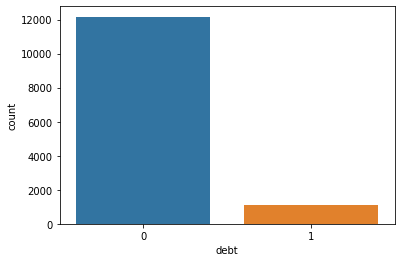

In [81]:
# вывод диаграммы для клиентов со средним уровнем дохода и ниже
average_lower_clients = df_log[df_log['total_income'] <= average_income]
sns.countplot(average_lower_clients['debt'])
print('Диаграмма наличия задолженности у клиентов со средним уровнем дохода и ниже')

То же самое проделаем для клиентов с уровнем дохода выше среднего:

Диаграмма наличия задолженности у клиентов с уровнем дохода выше среднего


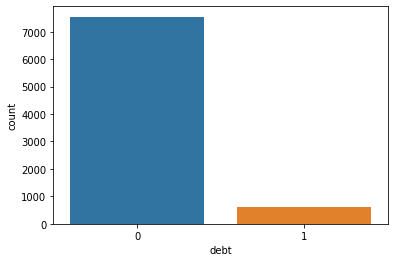

In [82]:
# вывод диаграммы для клиентов с уровнем дохода выше среднего
average_upper_clients = df_log[df_log['total_income'] > average_income]
sns.countplot(average_upper_clients['debt'])
print('Диаграмма наличия задолженности у клиентов с уровнем дохода выше среднего')

Напишем функцию, которая в процентах посчитает долю клиентов с задолженностью в зависимости от уровня дохода:

In [83]:
# функция для подсчёта клиентов с задолженностью в процентах
def total_income_debt_percent(data):
    return int(round(data['debt'].mean() * 100))

print('Наличие задолженности у клиентов со средним уровнем дохода и ниже:', total_income_debt_percent(average_lower_clients), '%')
print('Наличие задолженности у клиентов c детьми:', total_income_debt_percent(average_upper_clients), '%')

Наличие задолженности у клиентов со средним уровнем дохода и ниже: 8 %
Наличие задолженности у клиентов c детьми: 8 %


**Вывод**

Доли клиентов с задолженностью со средним уровнем дохода и ниже и с уровнем дохода выше среднего среди клиентов указанных групп равны. Т.е. в рамках названных групп фактор уровня дохода влияния не имеет.

- **Как разные цели кредита влияют на его возврат в срок?**

Теперь чтобы оценить влияние цели кредита на его возврат в срок, нужно построить столбчатые диаграммы для клиентов с разными кредитными целями *(классификацию целей мы провели при лемматизации)*.

Воспользуемся колонкой `purpose_group_id` для фильтрации *df_log* в зависимости от категории цели. Для каждой цели строим отдельную диаграмму со значениями колонки `debt` по горизонтали и количеством клиентов данной группы по вертикали.

Диаграмма наличия задолженности у клиентов с кредитной целью из категории "операции с недвижимостью"


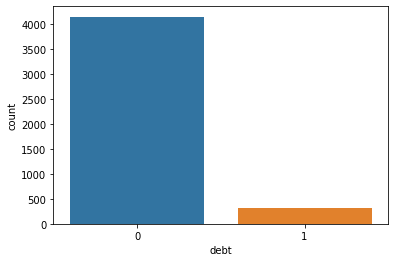

In [84]:
# построение диаграммы для кредитной цели из категории "операции с недвижимостью"
clients_purpose_group_0 = df_log[df_log['purpose_group_id'] == 0]
sns.countplot(clients_purpose_group_0['debt'])
print('Диаграмма наличия задолженности у клиентов с кредитной целью из категории "операции с недвижимостью"')

Диаграмма наличия задолженности у клиентов с кредитной целью из категории "сделки с автомобилем"


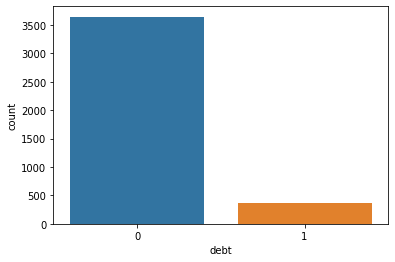

In [85]:
# построение диаграммы для кредитной цели из категории "сделки с автомобилем"
clients_purpose_group_1 = df_log[df_log['purpose_group_id'] == 1]
sns.countplot(clients_purpose_group_1['debt'])
print('Диаграмма наличия задолженности у клиентов с кредитной целью из категории "сделки с автомобилем"')

Диаграмма наличия задолженности у клиентов с кредитной целью из категории "образовательные услуги"


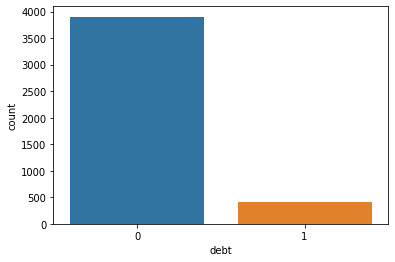

In [86]:
# построение диаграммы для кредитной цели из категории "образовательные услуги"
clients_purpose_group_2 = df_log[df_log['purpose_group_id'] == 2]
sns.countplot(clients_purpose_group_2['debt'])
print('Диаграмма наличия задолженности у клиентов с кредитной целью из категории "образовательные услуги"')

Диаграмма наличия задолженности у клиентов с кредитной целью из категории "свадебные расходы"


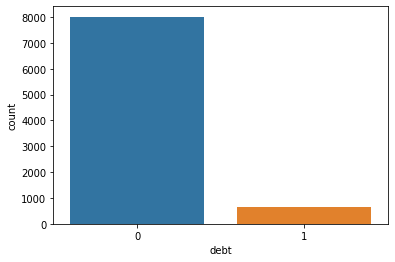

In [87]:
# построение диаграммы для кредитной цели из категории "свадебные расходы"
clients_purpose_group_3 = df_log[df_log['purpose_group_id'] == 3]
sns.countplot(clients_purpose_group_3['debt'])
print('Диаграмма наличия задолженности у клиентов с кредитной целью из категории "свадебные расходы"')

Чтобы проанализировать общую картину распределения задолженностей по категорям цели кредита, напишем функцию, которая в процентах посчитает долю клиентов с задолженностью в зависимости от кредитной цели:

In [88]:
# функция для подсчёта клиентов с задолженностью в процентах
def purpose_group_debt_percent(data):
    return int(round(data['debt'].mean() * 100))

print('Наличие задолженности у клиентов c кредитной целью из категории "операции с недвижимостью":', purpose_group_debt_percent(clients_purpose_group_0), '%')
print('Наличие задолженности у клиентов c кредитной целью из категории "сделки с автомобилем":', purpose_group_debt_percent(clients_purpose_group_1), '%')
print('Наличие задолженности у клиентов c кредитной целью из категории "образовательные услуги":', purpose_group_debt_percent(clients_purpose_group_2), '%')
print('Наличие задолженности у клиентов c кредитной целью из категории "свадебные расходы":', purpose_group_debt_percent(clients_purpose_group_3), '%')

Наличие задолженности у клиентов c кредитной целью из категории "операции с недвижимостью": 7 %
Наличие задолженности у клиентов c кредитной целью из категории "сделки с автомобилем": 9 %
Наличие задолженности у клиентов c кредитной целью из категории "образовательные услуги": 9 %
Наличие задолженности у клиентов c кредитной целью из категории "свадебные расходы": 8 %


**Вывод**

Цель кредита влияет на его возврат в срок. Больше всего задолженностей у клиентов, которые берут кредит на сделки с автомобилем и на образовательные услуги. Меньше всего задолженностей у клиентов с кредитной целью "операции с недвижимостью". Вероятно, клиенты очень ответственно подходят к покупке недвижимости и рассчитывают собственные средства, т.к. сумма кредита может быть значительной. Клиенты с задолженностью по кредиту с целью покрытия свадебных расходов занимают среднюю позицию, однако по численности группа клиентов с кредитной целью "свадебные расходы" является самой многочисленной.

## Шаг 4. Общий вывод

В результате исследования выяснено следующее: семейное положение потенциального клиента и наличие у него детей влияет на возврат кредита в срок. Вероятность возврата кредита в срок выше у клиентов, не состоящих в браке. Аналогичная зависимость прослеживается у клиентов без детей. Также найден дополнительный фактор, который влияет на возврат кредита в срок - цель кредита.